# Analyzing scaling with mass for 2D Multigrid code 
Jan 3, 2022 
Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import subprocess as sp

In [2]:
from ipywidgets import *

In [3]:
%matplotlib widget

In [4]:
# # Load data

def f_get_data(fname): # Modified for complex field
    
    def f_conv_complex(strg):
        ''' Convert input from a+ib to python complex form'''
        arr=[np.float64(k) for k in strg.split('+i')]
        return complex(arr[0],arr[1])
    
    arr=np.loadtxt(fname,delimiter=',',dtype=str)
    
    arr_iters=arr[:,0].astype(int) # First element is iteration number
    
    arr1=np.vectorize(f_conv_complex)(arr[:,1:-1]) # Skip last element (null string) and first (iteration)
    del(arr)
    # print(arr1.shape)
    L=int(np.sqrt(arr1.shape[1])) # Get lattice size
    num=arr1.shape[0]
    # print(L)
    # a3=arr1.reshape(134,L,L) :  simple reshape doesn't do it in the correct order
    ## Reshape to 2D image
    arr2=np.empty((num,L,L),dtype=complex)
    for i in range(num): 
        for x in range(L):
            for y in range(L):
                arr2[i,x,y]=arr1[i,x+y*L]

    print(arr2.shape)
    
    return arr2

def f_rescale(arr,mean):
    a1=np.array([abs(i-mean) for i in arr])
    a1=np.abs(a1)
    return a1

# _=f_get_data(fname)
# f_rescale(arr_lst[0][:5],soln)

In [24]:
fldr='../code/'

In [25]:
file_lst=glob.glob(fldr+'results_res_lvl*')
print(file_lst)

['../code/results_res_lvl-4.txt', '../code/results_res_lvl-0.txt', '../code/results_res_lvl-1.txt', '../code/results_res_lvl-3.txt', '../code/results_res_lvl-2.txt']


In [26]:
dict1={}
df_data=pd.DataFrame()

for fle in file_lst[:]:
    fname=fle
    lvls=int(fname.split('/')[-1].split('lvl-')[-1].split('.txt')[0])
    arr=f_get_data(fname)
    res_mag=np.array([np.linalg.norm(arr[i,:,:].flatten()) for i in range(arr.shape[0])])

    # iters=arr.shape[0]
    dict1={'lvls':lvls,'res_mag_arr':res_mag,'fname':fle}
    
    df_data=df_data.append(dict1,ignore_index=True)
    df_data=df_data.sort_values(by=['lvls'])
    

(77, 2, 2)
(77, 32, 32)
(77, 22, 22)
(77, 5, 5)
(77, 11, 11)


In [27]:
df_data

,lvls,res_mag_arr,fname
0,0.0,"[264.72826763752715, 3.0790106125374037, 1.360...",../code/results_res_lvl-0.txt
1,1.0,"[140.02262626164102, 12.311790339382402, 2.406...",../code/results_res_lvl-1.txt
4,2.0,"[41.78733342562717, 4.537028199255375, 1.74961...",../code/results_res_lvl-2.txt
2,3.0,"[9.756351893049745, 1.6321623429835113, 0.9682...",../code/results_res_lvl-3.txt
3,4.0,"[4.071679874816206, 0.8023430688138041, 0.6688...",../code/results_res_lvl-4.txt


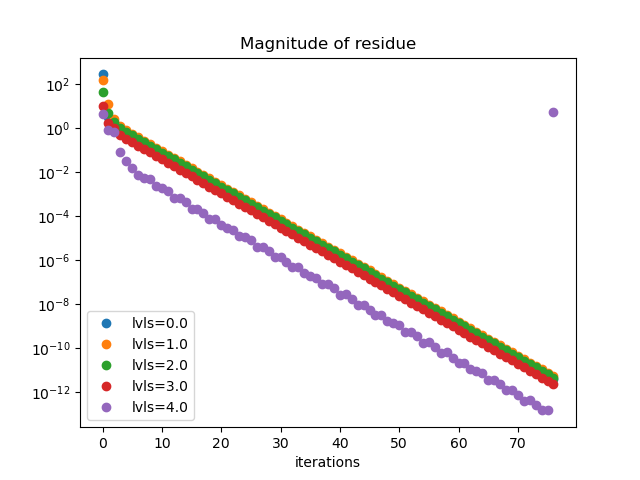

In [28]:

def f_plot_iters(df):
    plt.figure()

    for lvl in np.unique(df.lvls.values):
        df1=df[df.lvls==lvl]
        # display(df1)
        y=df1.res_mag_arr.values[0]
        # print(y[0])
        # print(y[0].shape)
        plt.plot(y,marker='o',linestyle='',label='lvls='+str(lvl))

    plt.yscale('log')
    plt.title("Magnitude of residue")
    plt.xlabel("iterations")
    plt.legend()
    plt.show()

f_plot_iters(df_data)

In [29]:
# interact(f_plot_iters,df=fixed(df_data),L=np.unique(df_data.L.values))

## Plot NTL weights

In [30]:
fname=fldr+'results_NTL_weights.txt'
arr=f_get_data(fname)
arr2=np.array([i.flatten() for i in arr])

(76, 2, 2)


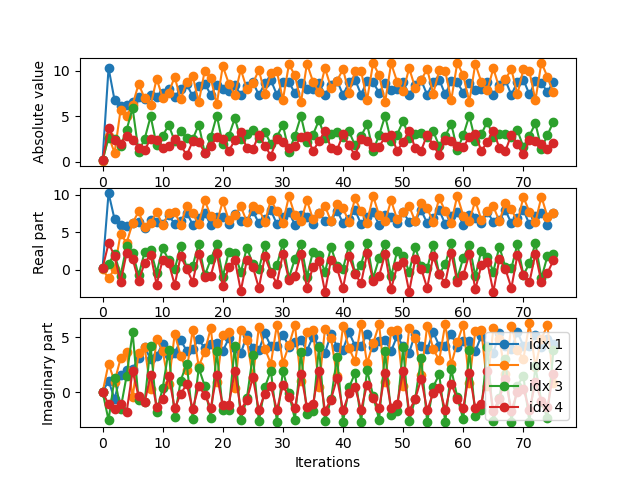

In [32]:
def f_plot_NTL_weights(arr):
    
    fig=plt.figure()
    
    fig.add_subplot(3,1,1)
    for i in range(arr.shape[1]):
        plt.plot(np.abs(arr[:,i]),marker='o',linestyle='-',label='idx '+str(i+1))
        
    plt.ylabel('Absolute value')
    
    fig.add_subplot(3,1,2)
    for i in range(arr.shape[1]):
        plt.plot(np.real(arr[:,i]),marker='o',linestyle='-',label='idx '+str(i+1))
        
    plt.ylabel('Real part')
    
    fig.add_subplot(3,1,3)
    for i in range(arr.shape[1]):
        plt.plot(np.imag(arr[:,i]),marker='o',linestyle='-',label='idx '+str(i+1))
        
    plt.legend(loc='lower right')
    plt.xlabel("Iterations")
    plt.ylabel('Imaginary part')
        
f_plot_NTL_weights(arr2)